In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator


In [21]:
tf.test.gpu_device_name()

2022-03-02 14:22:53.507406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


''

In [22]:
tf.__version__

'2.8.0'

In [23]:
from keras.datasets import mnist
(trainsetX, trainsety), (testsetX, testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))


Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [24]:
trainsetX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
trainsety

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
testsetX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [27]:
testsety

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<AxesSubplot:ylabel='count'>

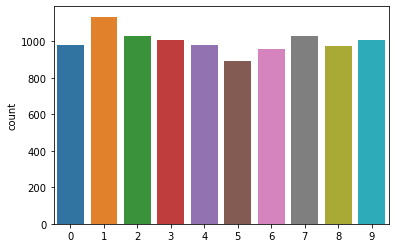

In [28]:
import seaborn as sns
sns.countplot(testsety)

<AxesSubplot:ylabel='count'>

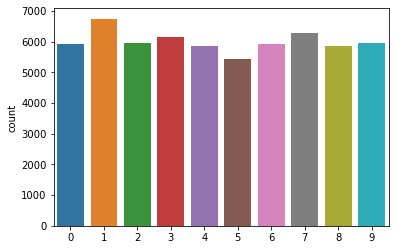

In [29]:
sns.countplot(trainsety)

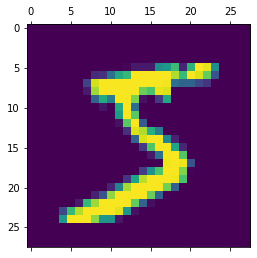

In [30]:
plt.matshow(trainsetX[0])

In [31]:
trainsety[0]

5

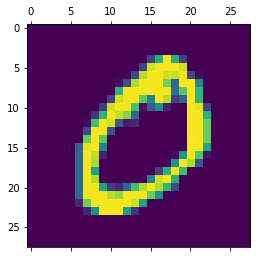

In [32]:
plt.matshow(trainsetX[1])

In [33]:
trainsety[1]

0

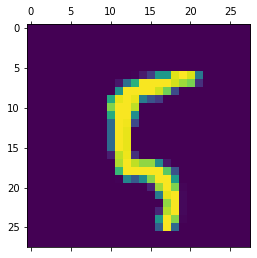

In [34]:
plt.matshow(trainsetX[100])

In [35]:
trainsety[100]

5

In [36]:
trainsetX = tf.keras.utils.normalize(trainsetX, axis = 1)
testsetX = tf.keras.utils.normalize(testsetX, axis = 1)

In [37]:
trainsetX

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [38]:
trainsetX[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(trainsetX,trainsety, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2628 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1060 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0396 - accuracy: 0.9872


In [41]:
model.save('handwritten.model')

2022-03-02 14:23:32.724968: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: handwritten.model/assets


In [42]:
loss, accuracy = model.evaluate(testsetX, testsety)
print(loss)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9770
0.08316519111394882


0.9769999980926514

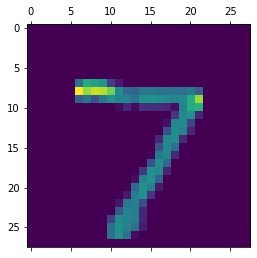

In [59]:
plt.matshow(testsetX[0])

In [60]:
y_predicted = model.predict(testsetX)

In [61]:
y_predicted[0]

array([1.1825317e-11, 1.7753851e-09, 5.1015974e-09, 3.2945866e-07,
       2.2823670e-13, 4.5389383e-11, 4.0156691e-17, 9.9999964e-01,
       6.4903832e-10, 1.0283734e-08], dtype=float32)

In [62]:
np.argmax(y_predicted[0])

7

This digit is probabily a 6


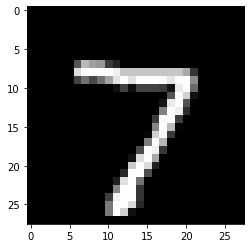

This digit is probabily a 8


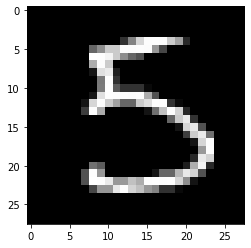

This digit is probabily a 5


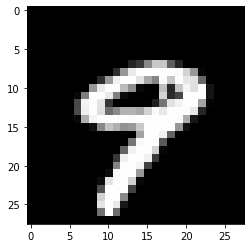

This digit is probabily a 8


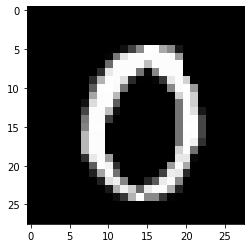

This digit is probabily a 2


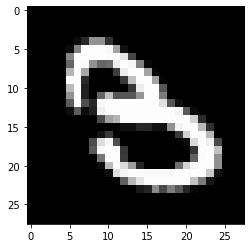

This digit is probabily a 5


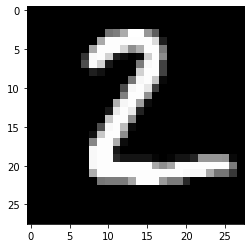

In [64]:
image_number = 1
while os.path.isfile(f'digits/digit{image_number}.png'):
    try:
        img = cv2.imread(f'digits/digit{image_number}.png')[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f'This digit is probabily a {np.argmax(prediction)}')
        plt.imshow(img[0],cmap = plt.cm.binary)
        plt.show()

    except:
        print('Erroe!')
    finally:
        image_number += 1